In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [3]:
os.chdir('C:/Users/jan_lenovo/Documents/MEGA/03_Doutoramento/08_Apresentações_publicações/E-Planning')

In [48]:
df_capacitated = pd.read_excel("Custos_por_algoritmos.xlsx", sheet_name="Capacitated_facility", header=0,\
             dtype= {'SubSection': str, 'School': str})

df_k_median = pd.read_excel("Custos_por_algoritmos.xlsx", sheet_name="K_median", header=0,\
dtype= {'SubSection': str, 'School': str})

df_escolas_reais = pd.read_excel("Custos_por_algoritmos.xlsx", sheet_name="Escolas_reais", header=0,\
dtype= {'SubSection': str, 'School': str})

df_capacitated = df_capacitated[:-1]
df_k_median = df_k_median[:-1]
df_escolas_reais = df_escolas_reais[:-1]

In [40]:
df_escolas_reais.head()

,SubSection,Dist,Alunos_2011,Dist_diaria,Custo
0,01180100101,1.183719,0.387975,0.918506,595.191565
1,01180100102,1.034467,0.969936,2.006735,1300.364269
2,01180100103,0.894086,1.551898,2.775062,1798.239874
3,01180100104,1.020419,0.969936,1.979483,1282.704755
4,01180100105,0.851745,0.387975,0.660910,428.269964


In [47]:
df_escolas_reais.iloc[-1:,]

,SubSection,Dist,Alunos_2011,Dist_diaria,Custo
637,01181100141,2.082987,0.581962,2.424438,1571.035709


In [49]:
df_capacitated['produto_dist_alunos'] = df_capacitated.Dist * df_capacitated.Alunos_alocados_2011
df_escolas_reais['produto_dist_alunos'] = df_escolas_reais.Dist * df_escolas_reais.Alunos_2011
df_k_median['produto_dist_alunos'] = df_k_median.Dist * df_k_median.Alunos_alocados_2011

In [226]:
df_gini=df_capacitated

In [227]:

df_gini=df_gini.sort_values(by = 'Dist')
df_gini['percent_dist'] =  df_gini.produto_dist_alunos / df_gini.produto_dist_alunos.sum()
df_gini['percent_alunos'] =  df_gini.Alunos_alocados / df_gini.Alunos_alocados.sum()
df_gini['Dist_cumsum'] = df_gini.produto_dist_alunos.cumsum()/df_gini.produto_dist_alunos.sum()
df_gini['Alunos_cumsum'] = df_gini.Alunos_alocados.cumsum()/df_gini.Alunos_alocados.sum()
df_gini.head()

,SubSection,School,Capacity,Alunos_alocados,Custo,Dist,produto_dist_alunos,percent_dist,percent_alunos,Dist_cumsum,Alunos_cumsum
0,1180600225,1180600225,225.0,1.745890,0.000000,0.000000,0.000000,0.000000,0.001975,0.000000,0.001975
1,1180700206,1180700206,225.0,1.163920,0.000000,0.000000,0.000000,0.000000,0.001317,0.000000,0.003292
2,1181000301,1181000301,225.0,0.775949,0.000000,0.000000,0.000000,0.000000,0.000878,0.000000,0.004169
3,1181000123,1181000301,225.0,0.969936,322.990207,0.498442,0.483457,0.000098,0.001097,0.000098,0.005267
4,1180700304,1180700206,225.0,2.133860,352.930114,0.544645,1.162197,0.000235,0.002414,0.000333,0.007680


In [228]:
b = [0]
b[1:] = df_gini.Dist_cumsum
Dist_sum = pd.Series(b)

b2 = [0]
b2[1:] = df_gini.Alunos_cumsum
Alunos_sum = pd.Series(b2)


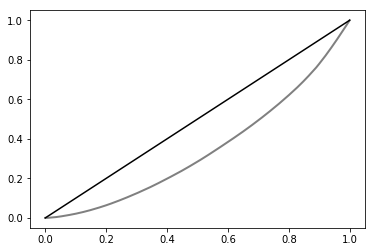

In [229]:
# we need the X values to be between 0.0 to 1.0
# plt.plot(np.linspace(0.0, 1.0, scaled_sum.size), scaled_sum, color = 'grey')
# plt.plot(np.linspace(0.0, 1.0, scaled_sum.size), scaled_sum, color = 'grey')
plt.plot(Alunos_sum, Dist_sum, linewidth=2, markersize=2, color = 'grey')
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1], color = 'black')
plt.show()

In [198]:
df_capacitated.head()

,SubSection,School,Capacity,Alunos_alocados,Unnamed: 4,Custo,Dist,per_alunos,per_dist,per_cum_pessoas,per_cum_distancias
0,1180600225,1180600225,225.0,1.745890,NaN,0.000000,0.000000,0.001982,0.000000,0.001982,0.000000
1,1180700206,1180700206,225.0,1.163920,NaN,0.000000,0.000000,0.001321,0.000000,0.003303,0.000000
2,1181000301,1181000301,225.0,0.775949,NaN,0.000000,0.000000,0.000881,0.000000,0.004183,0.000000
3,1181000123,1181000301,225.0,0.969936,NaN,322.990207,0.498442,0.001101,0.000175,0.005284,0.000175
4,1180700304,1180700206,225.0,2.133860,NaN,352.930114,0.544645,0.002422,0.000191,0.007706,0.000366


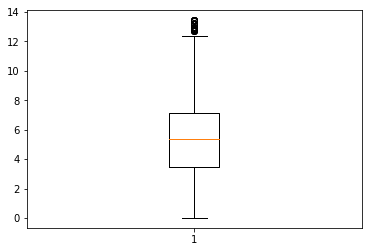

In [231]:
weighted_appearances = []
for index, row in df_capacitated.iterrows():
    weighted_row = [row.Dist]*int(row.Alunos_alocados)
    weighted_appearances += weighted_row
for index, row in df_capacitated.iterrows():
    weighted_row = [row.Dist]*int(row.Alunos_alocados)
    weighted_appearances += weighted_row

    
plt.boxplot(weighted_appearances)




plt.show()



# weighted_appearances = []
# for index, row in df.iterrows():
#     weighted_row = [row.ColA]*row.ColA_weights
#     weighted_appearances += weighted_row

# plt.boxplot(weighted_appearances)
# plt.show()

In [232]:
weighted_appearances

[0.0,
 0.0,
 0.5446452381030448,
 0.5446452381030448,
 0.693665412455713,
 0.7123362559423179,
 0.7247225903481697,
 0.7484501120890493,
 0.7484501120890493,
 0.7580397213207762,
 0.7580397213207762,
 0.7580397213207762,
 0.7580397213207762,
 0.7642548449598735,
 0.8034930948750479,
 0.864558434403628,
 0.8755715715339583,
 0.8755715715339583,
 0.9186579791341081,
 0.9337778988214399,
 1.184236625446534,
 1.184236625446534,
 1.2443654313622439,
 1.2443654313622439,
 1.2443654313622439,
 1.2443654313622439,
 1.2443654313622439,
 1.2692607674502208,
 1.2692607674502208,
 1.3172632922761667,
 1.3725051565471387,
 1.4682862873882856,
 1.473786757660673,
 1.473786757660673,
 1.4946272031009105,
 1.4946272031009105,
 1.4946272031009105,
 1.4946272031009105,
 1.4946272031009105,
 1.4946272031009105,
 1.4946272031009105,
 1.4967986388838703,
 1.4999524680704552,
 1.5280351313808873,
 1.5730324568170526,
 1.5877372233752625,
 1.5877372233752625,
 1.653269766408256,
 1.653269766408256,
 1.673526

[Text(0,0,'Sample1'), Text(0,0,'Sample2')]

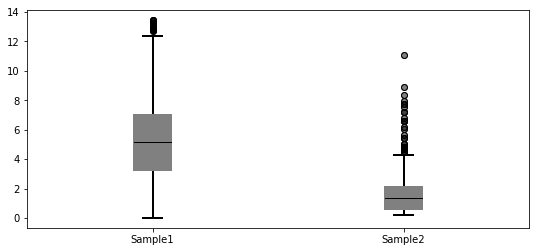

In [7]:
data_to_plot = (df_capacitated.Dist, df_capacitated.Alunos_alocados)

# Create a figure instance
fig = plt.figure(1, figsize=(9, 4))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot)

# add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='grey', linewidth=2)
    # change fill color
    box.set( facecolor = 'grey' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='black', linewidth=1)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
   
ax.set_xticklabels(['Sample1', 'Sample2'])

#Save the figure
#fig.savefig('fig1.png', bbox_inches='tight')

In [8]:
 np.average(df_capacitated.Dist,  weights = df_capacitated.Alunos_alocados)

5.585630270505735

In [52]:
df_capacitated.head()

,SubSection,School,Capacity,Alunos_alocados,Unnamed: 4,Custo,Dist,per_alunos,per_dist,per_cum_pessoas,per_cum_distancias
0,1180600225,1180600225,225.0,1.745890,NaN,0.000000,0.000000,0.001982,0.000000,0.001982,0.000000
1,1180700206,1180700206,225.0,1.163920,NaN,0.000000,0.000000,0.001321,0.000000,0.003303,0.000000
2,1181000301,1181000301,225.0,0.775949,NaN,0.000000,0.000000,0.000881,0.000000,0.004183,0.000000
3,1181000123,1181000301,225.0,0.969936,NaN,322.990207,0.498442,0.001101,0.000175,0.005284,0.000175
4,1180700304,1180700206,225.0,2.133860,NaN,352.930114,0.544645,0.002422,0.000191,0.007706,0.000366


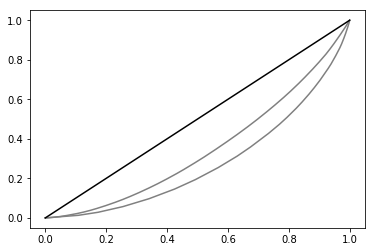

In [11]:
scaled_sum = df_capacitated.Dist.cumsum() / df_capacitated.Dist.sum()
ordered = df_capacitated.Alunos_alocados.sort_values()
scaled_sum_2 = ordered.cumsum() / ordered.sum()

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, scaled_sum.size), scaled_sum, color = 'grey')
plt.plot(np.linspace(0.0, 1.0, scaled_sum_2.size), scaled_sum_2, color = 'grey')

# plot the straight line perfect equality curve
plt.plot([0,1], [0,1], color = 'black')
plt.show()

